In [1]:
#import external modules 
%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
#generate times u dependent on N and k 
#then sum them to get tmrca
#do that 1000x
#create histogram 

In [21]:
Ne = 1000
samplesize = 10

In [22]:
def get_u(Ne, k):
    return -np.log(np.random.uniform(0,1)) * 4 * Ne / (k * (k-1))

In [23]:
print(get_u(Ne, 2))

497.2995010014052


In [30]:
def get_tmrca(Ne, n):
    tmrca = 0
    for k in range(2, n+1):
        u = get_u(Ne, k)
        tmrca += u
    return tmrca

In [31]:
get_tmrca(Ne, samplesize)

2208.151499370769

In [32]:
z = [get_tmrca(Ne, samplesize) for rep in range(1000)]

(array([ 5., 31., 60., 71., 91., 94., 82., 90., 63., 64., 50., 53., 45.,
        30., 30., 24., 14., 18., 13.,  9.,  8., 12.,  7., 10.,  1.,  6.,
         1.,  0.,  1.,  2.,  1.,  1.,  3.,  1.,  2.,  0.,  3.,  1.,  0.,
         0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([  386.04396539,   725.40388829,  1064.76381118,  1404.12373408,
         1743.48365697,  2082.84357987,  2422.20350276,  2761.56342566,
         3100.92334855,  3440.28327145,  3779.64319434,  4119.00311724,
         4458.36304013,  4797.72296303,  5137.08288592,  5476.44280882,
         5815.80273171,  6155.16265461,  6494.5225775 ,  6833.8825004 ,
         7173.24242329,  7512.60234619,  7851.96226908,  8191.32219198,
         8530.68211487,  8870.04203777,  9209.40196066,  9548.76188356,
         9888.12180645, 10227.48172935, 10566.84165224, 10906.20157514,
        11245.56149803, 11584.92142093, 11924.28134382, 12263.64126672,
        12603.00118961, 12942.36111251, 13281.72103541, 13621.080958

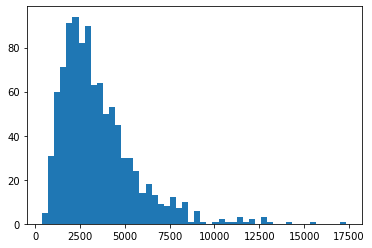

In [34]:
plt.hist(z, 50)

In [81]:
import string
import random

def get_tree(Ne, n):
    
    alphabet = list(string.ascii_letters)
    tips = alphabet[:n]
    tmrca = 0.0
    samplelist = [n - k for k in range(n - 1)]
    for k in samplelist:
        u  = get_u(Ne, k)
        tmrca += u
        pair = random.sample(tips,2)

        l1 = tips.index(pair[0])
        l2 = tips.index(pair[1])
        
        pair[0] = str(pair[0])+":"+str(tmrca)
        pair[1] = str(pair[1])+":"+str(tmrca)
        
        tips[l1] = pair[:]
        tips[l2] = tips[-1]
        tips = tips[:-1]
        
    tipstring = str(tips)
    translation_table = dict.fromkeys(map(ord, "\\"), None)
    tipstring = tipstring.translate(translation_table)
    translation_table = dict.fromkeys(map(ord, '"'), None)
    tipstring = tipstring.translate(translation_table)
    translation_table = dict.fromkeys(map(ord, "["), "(")
    tipstring = tipstring.translate(translation_table)
    translation_table = dict.fromkeys(map(ord, "]"), ")")
    tipstring = tipstring.translate(translation_table)
    return tmrca, tipstring

In [82]:
import string
print(list(string.ascii_letters))

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [83]:
tips = ['a','b','c']
print(tips[:-1])

['a', 'b']


In [85]:
get_tree(Ne, 3)

(670.9995176746966,
 "(('b:670.9995176746966', ('a:32.69340231391551', 'c:32.69340231391551'):670.9995176746966))")